In [1]:
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as snbs

In [2]:
fname='/home/maria/Downloads/c.elegans.herm_pharynx_1.graphml'
graph=nx.read_graphml(fname)

In [3]:
def parse_graph(graph):
    adj_lst={}
    for line in nx.generate_adjlist(graph):
        strp_n=line.replace("n", "")
        lst=strp_n.split(' ')
        int_lst=[]
        for ind in lst:
            int_lst.append(int(ind))
        adj_lst[int_lst[0]]=int_lst[1:]
    return adj_lst

In [4]:
adj_lst=parse_graph(graph)

In [10]:
print(adj_lst)

{0: [1, 4, 12, 13, 43, 54, 55, 56, 57, 58, 59, 67, 111, 158, 168, 169, 176, 178, 224], 1: [0, 5, 12, 13, 44, 53, 55, 56, 57, 59, 66, 159, 168, 177, 179, 183, 223], 2: [0, 3, 16, 53, 54, 59, 69, 70, 80, 82, 110, 116, 122, 128, 164, 171, 173, 174, 175, 182, 183, 186, 196, 198, 210, 214, 218, 229], 3: [1, 2, 22, 53, 54, 58, 60, 67, 68, 68, 69, 83, 110, 111, 129, 160, 173, 174, 175, 187, 203], 4: [0, 0, 20, 51, 132, 164, 173, 180, 219], 5: [1, 1, 11, 19, 21, 44, 52, 75, 157, 165, 174, 180, 218, 220, 232], 6: [7, 10, 12, 13, 22, 40, 43, 53, 54, 55, 57, 58, 58, 66, 67, 74, 132, 132, 178, 196], 7: [6, 11, 13, 40, 44, 54, 55, 56, 57, 58, 67, 77, 129, 149, 168, 169], 8: [9, 12, 17, 18], 9: [8, 13, 19, 40], 10: [0, 11, 12, 14, 20, 40, 41, 43, 45, 49, 72, 77, 112, 171, 196], 11: [1, 5, 7, 10, 13, 21, 40, 42, 46, 73, 73, 76, 77, 172], 12: [8, 18, 40, 53, 55, 109, 110, 161, 167, 171, 174, 174, 176, 177, 177, 182, 200, 201, 222], 13: [9, 54, 56, 59, 95, 109, 161, 164, 166, 173, 176, 176, 177, 181, 1

In [6]:
def adj_lst_to_mat(adj_lst):
    n_nodes=len(adj_lst.keys())
    con_mat=np.zeros((n_nodes,n_nodes))
    for node in adj_lst.keys():
        for adj in adj_lst[node]:
            con_mat[node,adj]=1
    return con_mat

In [7]:
conn_mat=adj_lst_to_mat(adj_lst)

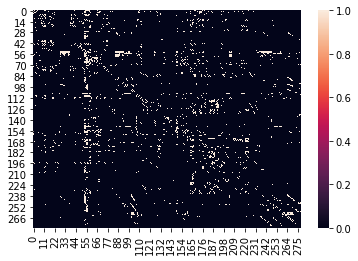

In [8]:
sns.heatmap(conn_mat)

In [16]:
#Differential equation
dt=0.01
x=np.random.normal(size=(279,))
dxdt=(-np.identity(279)+conn_mat)@x

In [12]:
print(conn_mat.shape)

(279, 279)


In [58]:
def update_rates(x):
    #rates = x
    r_0 = 1.0
    r_max = 100.0
    x[x<=0] = r_0*np.tanh(x[x<=0]/r_0)
    x[x>0] = (r_max-r_0)*np.tanh(x[x>0]/(r_max-r_0))

    return x

def step(x):
    dt=0.01
    #dxdt=(-np.identity(279)+conn_mat)@x
    #dxdt=(conn_mat)@x
    #dxdt=(-np.identity(279)+conn_mat_inh)@update_rates(x)
    dxdt=-x+(conn_mat_inh)@update_rates(x)
    x=x+dt*dxdt
    return x

In [59]:
step_lst=[]
inh_neurons=np.random.choice(279,100)
conn_mat_inh=conn_mat.copy()
conn_mat_inh[inh_neurons,:]=-conn_mat[inh_neurons,:]
x=np.random.normal(size=(279,))
for j in range(0,100):
    x=step(x)
    step_lst.append(x)

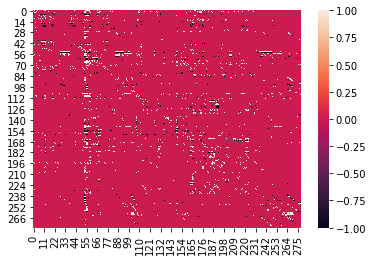

In [60]:
sns.heatmap(conn_mat_inh)

In [44]:
print(step_lst)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



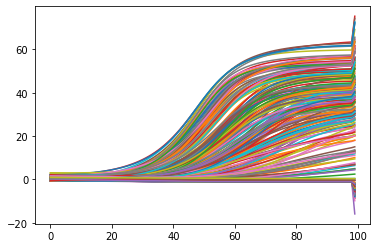

In [61]:
step_lst=np.array(step_lst)
plt.plot(step_lst)

In [34]:
eig_val,eig_vec=np.linalg.eig(-np.identity(279)+conn_mat)
print(eig_vec.shape)
print(ei)

(279, 279)
